# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Overview

In [ ]:
df = pd.read_csv('../Data/weight-height.csv')

In [ ]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


#### Distribusi kelas = 50% vs 50%

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10003 entries, 0 to 10002
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10003 non-null  object 
 1   Height  10003 non-null  float64
 2   Weight  10003 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.6+ KB


### Konversi Data Menjadi CM dan KG
Konversi Gender menjadi int
* 1 = male
* 0 = female

Data units
* `Weight` dalam pound (1 pound = 0.453592 kg)
* `Height` dalam inch (1 inch = 2.54 cm)

In [ ]:
# Konversi data gender menjadi numerik
df['Gender'] = df['Gender'] == 'Male'
df['Gender'] = df['Gender'].astype(np.int)

In [ ]:
# Konversi data unit dengan pandas apply
df['Height'] = df['Height'].apply(lambda x : x * 2.54)
df['Weight'] = df['Weight'].apply(lambda x : x * 0.453592)

In [ ]:
df.head()

,Gender,Height,Weight
0,1,187.571423,109.720985
1,1,174.706036,73.622732
2,1,188.239668,96.497550
3,1,182.196685,99.809504
4,1,177.499761,93.598619


### Data Tidak Realistik
Sepertinya data ini hanyalah data dummy yang tidak realistik. Terdapat orang dengan ketinggian 26 cm dan 442 cm, dan berat badan 18kg. Atau mungkin bisa saja jika orang tersebut terkena penyakit.

In [ ]:
df.describe()

,Gender,Height,Weight
count,10003.000000,10003.000000,10003.000000
mean,0.500050,168.586180,73.251060
std,0.500025,10.249981,14.733436
min,0.000000,26.477435,18.273985
25%,0.000000,161.302057,61.602280
50%,1.000000,168.447465,73.129901
75%,1.000000,175.704364,84.908170
max,1.000000,442.787220,236.251455


In [ ]:
def histogram_col_2(left,right,y_label,left_x_label,right_x_label,suptitle,grid=False):
    fig, axes = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(10,5))
    sns.histplot(left,ax=axes[0],kde=True)
    sns.histplot(right,ax=axes[1],kde=True)
    axes[0].set_ylabel(y_label)
    axes[0].set_xlabel(left_x_label)
    axes[0].grid(grid)
    axes[1].set_xlabel(right_x_label)
    axes[1].grid(grid)
    fig.suptitle(suptitle)
    plt.savefig('../Output/Histogram Data Berat Badan')
    plt.show()

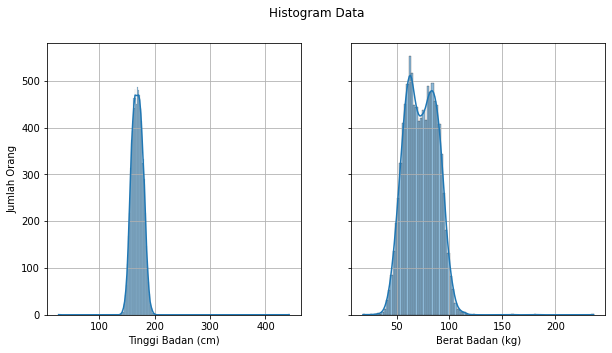

In [ ]:
histogram_col_2(
    left = df['Height'],
    right = df['Weight'],
    suptitle = 'Histogram Data',
    y_label = 'Jumlah Orang',
    left_x_label = 'Tinggi Badan (cm)',
    right_x_label = 'Berat Badan (kg)',
    grid=True
)

## Membuat Kalkulator BMI
BMI = m / h^2
* Underweight = <18.5
* Normal weight = 18.5–24.9
* Overweight = 25–29.9
* Obesity = BMI of 30 or greater

In [ ]:
def getBMI(tinggi,berat):
    tinggi_m = tinggi / 100
    bmi = berat / (tinggi_m * tinggi_m)
    return np.float(bmi)

In [ ]:
def defineBMI(bmi):
    if bmi <= np.float(18.5):
        return 0
    elif bmi >= np.float(18.5) and bmi <= np.float(25):
        return 1
    elif bmi >= np.float(25) and bmi <= np.float(29.9):
        return 2
    elif bmi >= np.float(29.9):
        return 3

In [ ]:
df['BMI'] = list(map(getBMI,df['Height'],df['Weight']))

In [ ]:
df.head()

,Gender,Height,Weight,BMI,Kategori
0,1,187.571423,109.720985,31.185761,3.0
1,1,174.706036,73.622732,24.121044,1.0
2,1,188.239668,96.497550,27.232906,2.0
3,1,182.196685,99.809504,30.067059,3.0
4,1,177.499761,93.598619,29.708033,2.0


In [ ]:
kategori_bmi = ['Kurang Berat Badan','Normal','Kelebihan Berat Badan','Obesitas']

In [ ]:
df['Kategori'] = df['BMI'].apply(defineBMI)

In [ ]:
# Cek nan value pada BMI
df[df.isna().any(axis=1)]

,Gender,Height,Weight,BMI,Kategori


In [ ]:
df.head()

,Gender,Height,Weight,BMI,Kategori
0,1,187.571423,109.720985,31.185761,3
1,1,174.706036,73.622732,24.121044,1
2,1,188.239668,96.497550,27.232906,2
3,1,182.196685,99.809504,30.067059,3
4,1,177.499761,93.598619,29.708033,2


#### Analisis Data BMI
Sepertinya terdapat data yang tidak realistis untuk kategori manusia. Terdapat orang dengan BMI `7.8` dan `370`. Nilai rata rata BMI `25.5` berarti bahwa rata rata orang memiliki kategori tubuh `normal` batas atas dan `kelebihan berat badan` batas bawah

In [ ]:
df.describe()

,Gender,Height,Weight,BMI,Kategori
count,10003.000000,10003.000000,10003.000000,10003.000000,10003.000000
mean,0.500050,168.586180,73.251060,25.511832,1.609317
std,0.500025,10.249981,14.733436,4.400673,0.552865
min,0.000000,26.477435,18.273985,7.821666,0.000000
25%,0.000000,161.302057,61.602280,23.464385,1.000000
50%,1.000000,168.447465,73.129901,25.733459,2.000000
75%,1.000000,175.704364,84.908170,27.559074,2.000000
max,1.000000,442.787220,236.251455,370.661844,3.000000


In [ ]:
kategori_bmi

['Kurang Berat Badan', 'Normal', 'Kelebihan Berat Badan', 'Obesitas']

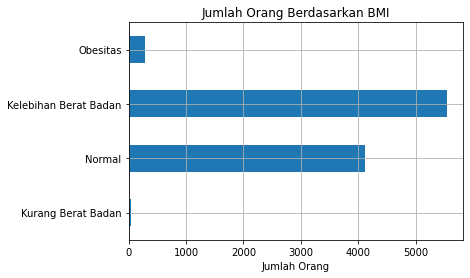

In [ ]:
df['Kategori'].value_counts().sort_index().plot.barh()
plt.yticks([0,1,2,3],kategori_bmi)
plt.xlabel('Jumlah Orang')
plt.title('Jumlah Orang Berdasarkan BMI')
plt.grid()
plt.savefig('../Output/Barplot Kategori BMI')
plt.show()

## Exploratory Data Analysis